**this is a template notebook for Assignment 2 on Clustering. To get a 60 you will need to complete chapter 1 and 2.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span>Classification Assignment: Australia Weather<Title of your notebook>


Author: <span>Stephen Pangga </span><br>
Student number: <span> 629860 </span><br>
Date: <span> 21/05/2022 </span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **\<add other packages\>**

From these we will need the following libraries:

In [37]:
# enter here all those 'from .... import ....'
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# pandas as pd   
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')
    
try:
    import seaborn as sn
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sn
    print('seaborn was not installed, installed and imported')

try:
    from sklearn.model_selection import train_test_split
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.model_selection import train_test_split
    print('sklearn was not installed, installed and imported')
    

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
    

NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported
seaborn already installed, only imported
sklearn already installed, only imported


# 1. The Data
We are going to use the datafile **<span style ='background:yellow'>weatherAUS.csv</span>**. This contains data **<span style ='background:yellow'> from kaggle and its about the daily weather for the past 10 years from the country Australia </span>**.



The explanation of the variable and type from https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package.

In [38]:
# enter the code to load the data
data = pd.read_csv('weatherAUSv2.csv')

Here's a quick look at the data:

In [39]:
# enter the code to see the first few rows of the data
#remove na values
data.dropna(inplace=True)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


**<span style ='background:yellow'>\<explain the variables (/fields/columns) you are going to use for your prediction. The dependent y (the one you are going to predict) and two independent x's (the ones you are going to use to predict that y). What do these variables mean?\></span>**
*note:* Its easiest if your independent x variables are numeric.


<span style ='background:blue'>
The variabes that ill be using are Rainfall, RainToday and RainTomorrow are going to be use for my prediction.
The Y dependent will be the RainTomorrow, the X indepentedent variables that i will be using are RainFall and RainToday.
The x variables:
* Rainfall - is the amount of rainfall that was recorded for the day. Measured in mm.
* RainToday - is the representation if it rain today or not. The data is a boolean, 1 (yes) if the precipitation in the last 24 hours has exceeded 1mm if not then 0 (no).
The y variables:
* RainTomorrow: is the amount of rain the next day in mm. A kind of measurement or the posibility of rain the next day presented in boolean values.
</span>

The categorical dependent variable <span style ='background:blue'> RainTomorrow <your y variable name></span> has the following categories:

In [40]:
# code that returns the different categories in the y variable.
data['RainTomorrow'] = pd.Categorical(data['RainTomorrow'])
data['RainTomorrow'].cat.categories

Index(['No', 'Yes'], dtype='object')

In [41]:
#convert yes or no to 1 or 2 as it will be easier to handle
data['RainToday'] = pd.Categorical(data['RainToday'])

#to make it easier to visualize the data make a new dataframe with the column i will be using
weather_df = pd.DataFrame()

#add to the dataframe
weather_df['Rainfall'] = data['Rainfall']
weather_df['RainToday'] = data['RainToday'].cat.codes
weather_df['RainTomorrow'] = data['RainTomorrow'].cat.codes

#a small visualization of the new dataframe
weather_df.head()


,Rainfall,RainToday,RainTomorrow
6049,0.0,0,0
6050,0.0,0,0
6052,0.0,0,0
6053,0.0,0,0
6054,0.0,0,0


We'll also need some training and testing data, so:

In [42]:
# code to split data in training and testing

#set the variables
x_var = weather_df[['Rainfall', 'RainToday']]
y_var = weather_df['RainTomorrow']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.4, random_state=101)


All set, lets try to predict this using our independent variables **<span> Rainfall & RainToday.<your x variables names></span>**

# 2. The Basic Classification Models

In the Jupyter Notebook from lecture 5 a few different Clustering techniques were discussed. Lets explore how these perform on the data.

Before we look at some 'real' models, its a good idea to get a baseline in by using one or more of the dummy classifiers. Lets see how they perform:

In [43]:
# code to create, fit and measure the dummy classifiers (see chapter 5.4. in the lecture notebook)
# include both the accuracy score and the confusion matrix for each.

# print("Dummy classsifier - Most Frequent")
# dumMF = DummyClassifier(strategy='most_frequent')
# dumMF = dumMF.fit(x_train, y_train)
# y_pred = dumMF.predict(x_test)

def dummy_classifier (xtrain, xtest, ytrain, strats):
    dumMF = DummyClassifier(strategy=strats)
    dumMF = dumMF.fit(xtrain, ytrain)
    y_pred = dumMF.predict(xtest)
    print('The accuracy score: ', metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


print("Dummy classsifier - Most Frequent")
dummy_classifier(x_train, x_test, y_train, 'most_frequent')

print("Dummy classsifier - Uniform")
dummy_classifier(x_train, x_test, y_train, 'uniform')

print("Dummy classsifier - Stratified")
dummy_classifier(x_train, x_test, y_train, 'stratified')

print("Dummy classsifier - Prior")
dummy_classifier(x_train, x_test, y_train, 'prior')


Dummy classsifier - Most Frequent
The accuracy score:  0.7632679318108717
[[4746    0]
 [1472    0]]
Dummy classsifier - Uniform
The accuracy score:  0.4975876487616597
[[2393 2353]
 [ 771  701]]
Dummy classsifier - Stratified
The accuracy score:  0.6362174332582824
[[3638 1108]
 [1154  318]]
Dummy classsifier - Prior
The accuracy score:  0.7632679318108717
[[4746    0]
 [1472    0]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean?></span>**


<span style ='background:blue'>
The number represents how each model of the different model of classifiers performs, which shows how accurate the classifiers are and below the accuracy score is the confusion matrix to display the performance of the classifiers and summarize the performance.
Looking at the results, 'Most frequent' & 'Prior' classifier model have performed the best scoring identical percentage of 77%.
</span>

So, those are our 'baseline'. A model should be able to at least outperform these.

Lets dive in...

## 2.1. Naive Bayes

The first model discussed was the Naive Bayes model. 

**<span style ='background:yellow'>\<explain briefly in your own words how a Naive Bayes method works></span>**

<span style ='background:blue'>
Naive Bayes is a algorithm that is used for classification, applying the Bayes theorem assuming that variables are independent of each other.
Calculating probability:

\begin{equation*}
P(A|B) = \frac{P(B|A)\times P(A)}{P(B)}
\end{equation*}

Using equation, we can find the probability of A based on the probability of B.
</span>

Lets create and fit this model:

In [44]:
# code to create the model, and fit the data.
from sklearn.naive_bayes import CategoricalNB

catNB = CategoricalNB()
catNB.fit(x_train, y_train)
prediction1 = catNB.predict(x_test)

Now to measure its performance:

In [45]:
# code to show its accuracy score AND confusion matrix.
print(catNB.score(x_test, y_test))
print(confusion_matrix(y_test, prediction1))

0.7376970086844644
[[3960  786]
 [ 845  627]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers?></span>**

Lets also have a look at what a prediction would be. If the **<span style ='background:yellow'>\<your first x variable><span>** has a score of **<span style ='background:yellow'>\<enter some value></span>** and the **<span style ='background:yellow'>\<your other x variable></span>** has a score of **<span style ='background:yellow'>\<enter some value></span>**, then this model will predict:

In [46]:
# code to show the prediction
# 2009-03-02,Cobar,20,31.1,0,10.4,3,SE,30,E,NW,7,6,31,31,1013.4,1012.7,7,6,23.1,29.3,No,No

# lets find a random columm for our data
predict_test = weather_df
predict_test.loc[0] = [4.8, 1,1]


predictions =predict_test[["Rainfall", "RainToday"]]
print(catNB.predict(predictions))

[0 0 0 ... 0 1 1]


That's about it for NB. A nice thing about NB is that it doesn't really require any parameters. Lets look at our next technique.

## 2.2. Support Vector Machines
The second model discussed were Support Vector Machines. There is a plural here, because we can use different kernels.

**<span style ='background:yellow'>\<explain briefly in your own words how a SVM method works></span>**

The basic kernel is the linear one, so we'll attempt that first:

In [47]:
# code to create the model, and fit the data.
from sklearn.svm import SVC

svmLin = SVC(kernel = 'linear')
svmLin.fit(x_train, y_train)
y_pred = svmLin.predict(x_test)


Measuring its performance....

In [48]:
# code to show its accuracy score AND confusion matrix.
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7701833386941138
[[4679   67]
 [1362  110]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, and the NB?></span>**

Lets do the same for the other kernels that were discussed, i.e. rbf, polynomial, and sigmoid.

In [49]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.

#method to create model of support vector machine and show result
def SVM (xtrain, ytrain, xtest, ytest, kernel_type):
    svm = SVC(kernel = kernel_type)
    svm.fit(xtrain,ytrain)
    y_pred = svm.predict(xtest)
    print(metrics.accuracy_score(ytest, y_pred))
    print(confusion_matrix(ytest, y_pred))

In [50]:
print(' SVM - RBF ')
SVM(x_train, y_train, x_test, y_test, 'rbf')

 SVM - RBF 
0.7748472177549051
[[4594  152]
 [1248  224]]


In [51]:
print(' SVM - Sigmoid ')
SVM(x_train, y_train, x_test, y_test, 'sigmoid')

 SVM - Sigmoid 
0.7751688645866838
[[4540  206]
 [1192  280]]


In [52]:
# print(' SVM - Polynomial ')
# SVM(x_train, y_train, x_test, y_test, 'poly')

#this SVM method took so long to give result, i ran it over night
# 0.77717391304343783   - 0.7853260869565217
# [[271  1]   - [[275  3]
#  [ 81 15]]  - [76  14]]

**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers?></span>**

Allright, lets move on to the third technique...

## 2.3. K-Nearest Neighbors
The third technique is the K-Nearest Neighbors (KNN). 

**<span style ='background:yellow'>\<explain briefly in your own words how a KNN method works></span>**

To use this we need to do some additional steps.

First we need to normalize our x variables:

In [53]:
# use the StandardScaler to normalize the two x variables
from sklearn.preprocessing import StandardScaler

#set the scalar
scaler = StandardScaler()
scaler.fit(x_train)

# Convert the train and test X values, using the same scaler (so based on the X_train)
X_trainScaled = scaler.transform(x_train)
X_testScaled = scaler.transform(x_test)

Second we need to determine how many neighbors (k) we want. To do this we'll visualize the results using different values for k.

In [54]:
# Code to create the graph with Error Rate vs. K-values.
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainScaled, y_train)
    pred_i = knn.predict(X_testScaled)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

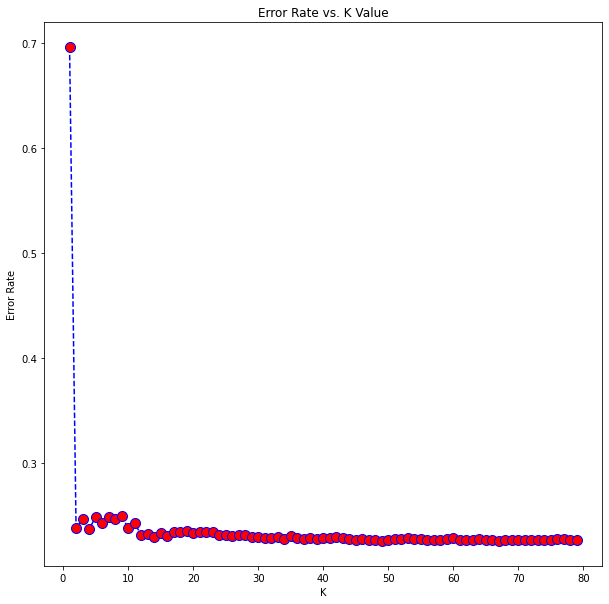

In [55]:
#The visualisation
plt.figure(figsize=(10,10))
plt.plot(range(1,80),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**<span style ='background:yellow'>\<explain the result and your choice for k based on the graph></span>**

*Note:* +0.5 if you also use the GridSearch technique to decide on k.

In [56]:
from sklearn.model_selection import GridSearchCV

# List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_trainScaled, y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


# I ran this code and took a long time, therefore i will just show the result here again.

# Best leaf_size : 1
# Best p: 1
# Best n_neighbors: 21


Best leaf_size: 1
Best p: 1
Best n_neighbors: 21


The GridSearch Technique took sometime to give results, i had to run it all night. So, to make it easier, I commented out the code and give the result here



Now that we know what we want k to be, we can create the model.

In [57]:
# code to create the model with the selected k
knnOptimal = KNeighborsClassifier(n_neighbors=21, leaf_size=1, p=1)
y_pred_optimal = knn.predict(X_testScaled)
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred_optimal))
print(confusion_matrix(y_test, y_pred_optimal))

accuracy score:  0.7732389835960116
[[4560  186]
 [1224  248]]


In [58]:
# code to create the model with the selected k
knn = KNeighborsClassifier(n_neighbors=43)

knn.fit(X_trainScaled, y_train)
y_pred=knn.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))

0.7717915728530074


Lets find out how good it is:

In [59]:
# code to show its accuracy score AND confusion matrix.
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy score:  0.7717915728530074
[[4558  188]
 [1231  241]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, and the SVM kernels?></span>**

One more basic technique to go.

## 2.4. Decision Trees
The last technique that was discussed in detail, were the Decision Trees. 

**<span style ='background:yellow'>\<explain briefly in your own words how a Decision Tree method works></span>**

The following variations were discussed:

* ID3 (or entropy with sklearn)
* Gini
* Random Forest
* Extra trees

Hopefully we have the hang of this now, so lets do each of them in one go:

In [60]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


print('Decision Tree - ID3/Entropy')
ent_dtc = DecisionTreeClassifier(criterion = "entropy")
ent_dtc.fit(X_trainScaled,y_train)
y_pred = ent_dtc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Decision Tree - Gini')

gini_dtc = DecisionTreeClassifier(criterion = "gini")
gini_dtc.fit(X_trainScaled,y_train)
y_pred = gini_dtc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Random Forest')
rfc = RandomForestClassifier(random_state=0)
rfcModel = rfc.fit(X_trainScaled, y_train)
y_pred = rfcModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Extra Trees')
# Extremly Random Forest (a.k.a. Extra trees)
erfc = ExtraTreesClassifier(random_state=0)
erfc = erfc.fit(X_trainScaled, y_train)
y_pred = erfc.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Decision Tree - ID3/Entropy
0.763911225474429
[[4582  164]
 [1304  168]]
Decision Tree - Gini
0.763911225474429
[[4582  164]
 [1304  168]]
Random Forest
0.7648761659697652
[[4552  194]
 [1268  204]]
Extra Trees
0.7648761659697652
[[4582  164]
 [1298  174]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, the SVM kernels, and the knn?></span>**

One last set of techniques to explore.

## 2.5. Other Models
In the Jupyter Notebook from the lecture, in chapter 5.4 a few more techniques were simply shown:

* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Logistic Regression Classifier
* Multinomial Logistic Regression Classification
* Adaptive Boosting
* Gradient Boosting
* Histogram Gradient Boosting
* XGBoost
* Stacking

Out of curiousity lets see how these perform.

In [61]:
# code to create the models, fit the data, and show its accuracy score (the confusion matrix is here optional).
# make sure to print some text between to indicate which result belongs to which model.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print('Linear Discriminant Analysis')
lda = LinearDiscriminantAnalysis()
ldaModel=lda.fit(X_trainScaled, y_train)
y_pred=ldaModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

print('Quadratic Discriminant Analysis')
qda = QuadraticDiscriminantAnalysis()
qdaModel=qda.fit(X_trainScaled, y_train)
y_pred=ldaModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.linear_model import LogisticRegression

print('Logistic Regression Classifier')
logreg = LogisticRegression()
lrModel = logreg.fit(X_trainScaled, y_train)
y_pred = lrModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.linear_model import LogisticRegression

print('Multinomial Logistic Regression Classification')
logreg = LogisticRegression(multi_class='multinomial')
lrModel = logreg.fit(X_trainScaled, y_train)
y_pred = lrModel.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.ensemble import AdaBoostClassifier

print('Adaptive Boosting')
adaBst = AdaBoostClassifier(random_state=0)
adaBst = adaBst.fit(X_trainScaled, y_train)
y_pred = adaBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting')
gradBst = GradientBoostingClassifier(random_state=0)
gradBst = gradBst.fit(X_trainScaled, y_train)
y_pred = gradBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.ensemble import HistGradientBoostingClassifier

print('Histogram Gradient Boosting')
histBst = HistGradientBoostingClassifier(random_state=0)
histBst = histBst.fit(X_trainScaled, y_train)
y_pred = histBst.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))]

print('Stacking')
stackCl = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stackCl.fit(X_trainScaled, y_train)
y_pred = stackCl.predict(X_testScaled)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


#need to figure out xgboost


Linear Discriminant Analysis
0.7753296880025732
[[4580  166]
 [1231  241]]
Quadratic Discriminant Analysis
0.7753296880025732
[[4580  166]
 [1231  241]]
Logistic Regression Classifier
0.7737214538436796
[[4644  102]
 [1305  167]]
Multinomial Logistic Regression Classification
0.773882277259569
[[4643  103]
 [1303  169]]
Adaptive Boosting
0.7742039240913478
[[4539  207]
 [1197  275]]
Gradient Boosting
0.7685751045352204
[[4593  153]
 [1286  186]]
Histogram Gradient Boosting
0.7664844001286587
[[4548  198]
 [1254  218]]
Stacking


c:\Users\steph\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\steph\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\steph\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\steph\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\steph\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7729173367642329
[[4630  116]
 [1296  176]]


c:\Users\steph\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**<span style ='background:yellow'>\<which performed best?></span>**

<font size="5"><center>-----Chapters 1 and 2 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 3. Visualisation

With two input parameters we can actually determine visually where a model will classify a variable into which category. An overview of such plots is shown at https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

We cannot copy that code since it does a comparison. What we want is a function that takes the X and Y data as input, as well as the model to be used and then shows the decision areas.

In [62]:
# the code for the function


In [63]:
# an example of using the function


# 4. Categorical Input
With classification we have a categorical output variable, but what if we also have one or more categorical input variables.

One popular technique is one-hot-encoding, but there are others.

In this chapter we'll discuss **<span style ='background:yellow'>\<your chosen technique></span>**.

**<span style ='background:yellow'>\<explain the technique in detail. What does it do and how does it work></span>**

In [64]:
# example code of using this technique


# 5. Performance
Some models get higher accuracy scores than others. In the Jupyter Notebook from the lecture the UFC data was used and the QDA had the highest accuracy score: 0.6747. The big question is, can it be done better? First areas to look for improvement are to simply increase the number of input variables, or tweak some parameters of some of the models, or a combination of both.

In this chapter we'll give it an attempt.

First we need to load the data:

In [65]:
# code to load the UFC data


**<span style ='background:yellow'>\<explain your attempt, what did you do.></span>**

In [66]:
# code that will generate an accuracy score for the outcome that is higher than 0.6747


# 6. A New Technique

Many techniques were discussed in class and the lecture Jupyter Notebook, but there are a lot more. In this chapter the \<your chosen new technique> is discussed.

**<span style ='background:yellow'>\<explain in detail this new technique. Note that other students should be able to understand it from your explanation alone!></span>**

In [67]:
# code on using this technique


**<span style ='background:yellow'>\<feel free to use more cells for this, you probably need them></span>**